First things first, we need to import the required libraries that are needed to run this program. In this case, I replaced "%matplotlib notebook" with "%matplotlib inline". The notebook option only works on Jupyter Notebook and does not work in Google Colab. Instead, Google Colab requires "%matplotlib inline" or "plt.show()" for interactive plot visualization.

The "numpy" and "pandas" libraries are used for numerical operations and data manipulation. The program stores them in the variables "np" for NumPy and pd for "pandas".

Next, "ListedColormap" is imported to create custom color maps for visualization. Then, the "LogisticRegression" model is imported from "sklearn.linear_model". This serves as our machine learning model for identifying or predicting the object or class. Below that, mpatches from "matplotlib.patches" is used for creating a legend in the plot.

Lastly, the "train_test_split" function splits the dataset into training and testing sets. This is important and essential for evaluating the performance of our model by properly dividing the dataset into training and test data.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split

This line ensures that "NumPy" or "np" arrays display only with decimal points using the method "set_printoptions()" with the parameter "precision=2", which is a floating value or sets the value to 2 decimal places.

In [ ]:
np.set_printoptions(precision=2)

Now, the dataset was imported to my local "gdrive" using the function "from google.colab import drive" and the "mount" method with "/content/drive" as my parent directory. Finally, the dataset is read using the "read_csv" method with the directory path of "fruit_data_with_colors.csv" and stored in the "fruits" variable for simplicity.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

fruits = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/fruit_data_with_colors.csv')            #Debugged by Lyle R.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Next, the features and Label was extracted. First, by using the "features_names_fruits", it specifies the feature columns (height, width, mass, color_score). Second, the "X_fruits" (predictor) extracts and stored these feature values from the dataset. Next, "y_fruits" contains the "fruit_label" as the target variable, which represents the type of fruit. Lastly, using the "target_names_fruits" labels the corresponding fruit classes, these are apple, mandarin, orange, lemon.

In [ ]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

Instead of using all four features, the program only take the height and with for visualization and stored in the value of 'X_fruits_2d'togerther with the fruit label as the target value that stored in 'y_fruits_2d'. This make it easier to plot decision boundaries in a 2D space.

In [ ]:

X_fruits_2d = fruits[['height', 'width']]       #Debugged by Lyle R.
y_fruits_2d = fruits['fruit_label']


This portion defines a function to visualize decision boundaries of the classifier in the "plot_class_regions_for_classifier_subplot" function.

Inside the function, the first step is to determine the number of unique classes by using "np.amax(y) + 1". This finds the highest class label in "y" and adds 1 to count all classes correctly. Then, two lists of colors, "color_list_light" and "color_list_bold", are created. The "color_list_light" is used for the background of the decision regions, while "color_list_bold" is used for plotting the actual data points. The "ListedColormap" function is used to convert these lists into a format that "matplotlib" can use.

Next, several values are set to control the plot appearance. The variable "h" defines the step size for creating the grid, which helps in plotting smooth decision boundaries. The variable "k" is used to add padding around the plot. The "x_plot_adjust" and "y_plot_adjust" values help adjust the plot limits, and "plot_symbol_size" controls the size of the data points in the plot.

The next part finds the minimum and maximum values of "x" and "y" using "x[:, 0].min()", "x[:, 0].max()", "x[:, 1].min()", and "x[:, 1].max()". This helps in defining the boundaries of the plot. A grid of points is created using "np.meshgrid()", which generates all possible x-y coordinates for the entire plot area.

The classifier "clf" is then used to predict the class for each point in the grid. This is done by reshaping the grid using "np.c_[x2.ravel(), y2.ravel()]" so that all points can be passed into the classifier at once. The predictions are then reshaped using "P.reshape(x2.shape)" to match the original grid dimensions.

If "plot_decision_regions" is set to "True", the function uses "subplot.contourf()" to fill the decision regions with colors based on the predictions. Then, the training data points are plotted on top of the decision regions using "subplot.scatter()". The limits of the plot are adjusted using "set_xlim()" and "set_ylim()" to make sure all points fit well within the graph.

If test data "X_test" is provided, it is plotted separately using a different marker ("^") to distinguish it from the training data. The accuracy of the classifier on both training and test data is calculated using "clf.score()" and added to the title of the plot.

The function then sets the title of the subplot using "subplot.set_title()". If "target_names" is provided, a legend is created using "mpatches.Patch()" to assign a color to each class label. The legend is then added to the plot using "subplot.legend()".

After defining the function, the next part of the code creates a figure using "plt.subplots()" and stores it in "fig" and "subaxes". The dataset is filtered so that "y_fruits_apple" contains only the labels where "fruit_label" is 1 (representing apples). The dataset is then split into training and test sets using "train_test_split()", ensuring that the classifier is trained and tested on separate data.

The logistic regression model is trained using "clf.fit(X_train, y_train)". Then, the function "plot_class_regions_for_classifier_subplot()" is called to visualize the decision boundaries and data points. Finally, "plt.show()" is used to display the plot.

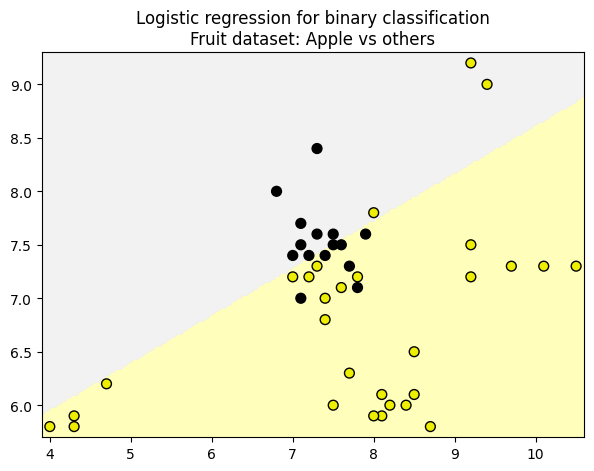

In [ ]:

def plot_class_regions_for_classifier_subplot(clf, x, y, X_test, y_test, title, subplot, target_names = None,
                                              plot_decision_regions = True):
    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold = ListedColormap(color_list_bold[0:numClasses])


    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = x[:, 0].min()
    x_max = x[:, 0].max()
    y_min = x[:, 1].min()
    y_max = x[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min - k, x_max + k, h), np.arange(y_min - k, y_max + k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
      subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

      subplot.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')  #Debugged by Lyle R.
      subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
      subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
      subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor='black')
      train_score = clf.score(x,y)
      test_score = clf.score(X_test, y_test)
      title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
      legend_handles = []
      for i in range(0, len(target_names)):
        patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])        #Debugged by Lyle R.
        legend_handles.append(patch)
      subplot.legend(loc=0, handles=legend_handles)



fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.values,
                 y_fruits_apple.values,
                 random_state =  0)
)

clf = LogisticRegression(solver='liblinear', C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None,
                                          'Logistic regression for binary classification\nFruit dataset: Apple vs others',
                                          subaxes)

plt.show()

In this part, the program checks what type of fruit has a height of 6 and a width of 8. The variables "h" and "w" are set to these values, and then the model predicts the class of the fruit using "clf.predict([[h, w]])". The prediction result is either 0 (not an apple) or 1 (an apple). To make the output easy to understand, the result is used as an index in the list ['not an apple', 'an apple']. This means if the model predicts 1, the program prints "an apple". Otherwise, it prints "not an apple". The final result is displayed using "print()".


Note: I  changed the format of h = 6, w =  8with h, w = 6, 8 for simplicity.

In [ ]:
h, w= 6, 8
print('A fruit with height {} and width {} is predicted to be: {}'
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))  #Debugged by Lyle R.

A fruit with height 6 and width 8 is predicted to be: an apple


<ipython-input-163-35926cfca8bc>:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))  #Debugged by Lyle R.


This part does the same thing as the previous portion but with different values. Now, the height is set to 10 and the width to 7, and the model predicts what type of fruit it is. The prediction is done in the same way, using "clf.predict([[h, w]])", and the result is displayed as "an apple" or "not an apple". After making the prediction, the program labels the x-axis as "height" and the y-axis as "width" using "subaxes.set_xlabel()" and "subaxes.set_ylabel()". This helps in making the plot clear by showing what each axis represents.

Note: I  changed the format of h = 10, w =  7 with h, w = 10, 7 for simplicity.

In [ ]:
h, w = 10, 7
print('A fruit with height {} and width {} is predicted to be: {}'
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))  #Debugged by Lyle R.
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

A fruit with height 10 and width 7 is predicted to be: not an apple


<ipython-input-161-c307a89ae8d4>:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))


Text(4.444444444444452, 0.5, 'width')

In this final part of the program, it checks or evaluate how well the model performs by calculating its accuracy. The function "clf.score(X_train, y_train)" is used to measure how well the model predicts on the training data, while "clf.score(X_test, y_test)" checks its performance on new data (test set). The results are formatted to two decimal places using "{:.2f}" to make them easier to read. Finally, the accuracy values are displayed using "print()". This helps to see if the model is working well or if it needs improvement.

In [ ]:
print('Accuracy of logistic regression classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'  #Debugged by Lyle R.
      .format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.77
Accuracy of logistic regression classifier on test set: 0.73
